In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Ornstein Uhlenbeck

In [ ]:
from utils.ornstein_uhlenbeck import OrnsteinUhlenbeck

In [ ]:
a = 1.0
step_sizes = [0.1, 0.5, 1.0]
steps = 100
init_value = 0.0

fig, ax = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Ornstein Uhlenbeck Process for Different Step Sizes")
fig.tight_layout()
for i, h in enumerate(step_sizes):
    proc = OrnsteinUhlenbeck(init_value=init_value, h=h, a=a)
    proc.simulate(steps)
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('Y')
    ax[i].set_title(f"h = {h}")
    ax[i].plot(np.linspace(0.0, h * steps, num=steps+1), proc.vals)

plt.show()

# Feller Diffusion
Stop simulation at extinction time, or the first tiem the value is less than or equal to 0.

In [4]:
from utils.feller import Feller

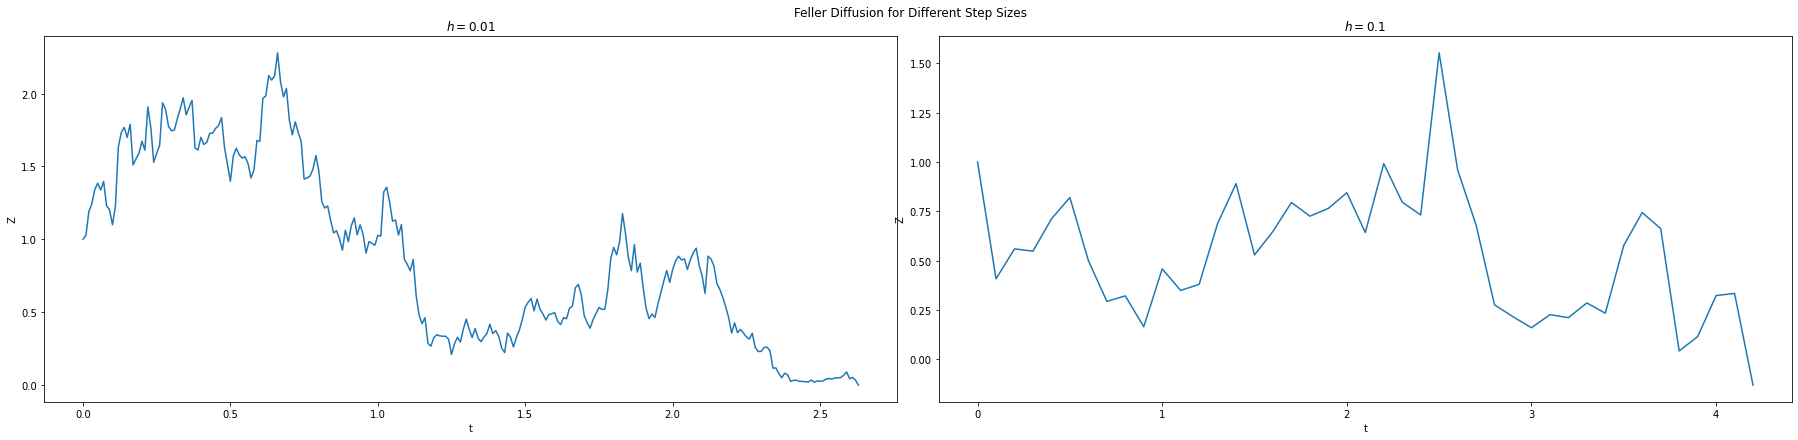

In [5]:
a = 1.0
step_sizes = [0.01, 0.1]
#steps = 100
init_value = 1.0

fig, ax = plt.subplots(1, len(step_sizes), figsize=(25, 6))
fig.suptitle("Feller Diffusion for Different Step Sizes")
fig.tight_layout()
for i, h in enumerate(step_sizes):
    proc = Feller(init_value=init_value, h=h)
    #proc.simulate(steps)
    steps = proc.extinct_simulate()
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('Z')
    ax[i].set_title(f"$h = {h}$")
    ax[i].plot(np.linspace(0.0, h * steps, num=steps+1), proc.vals)

plt.show()

# Another Matrix Completion Problem
Residual matrix completion problem and simulating an SDE based off of the residual. 

In [26]:
from utils.matrix_completion import MatrixCompletion
import math
import pylab
import matplotlib

Debugging Block

In [3]:
#print(get_Pbeta(float('inf'), np.array([1, 2, 3])))
proc = MatrixCompletion(init_value=np.zeros(5), h=0.01, beta=float('inf'))
#proc.
print(proc.get_noise(np.array([1, 1, 1, 1, 1])))
proc.step()
print(proc.vals)
proc.step()
print(proc.vals)

[0.0243234 0.0243234 0.0243234 0.0243234 0.0243234]
[array([0., 0., 0., 0., 0.]), array([0.11000443, 0.11000443, 0.11000443, 0.11000443, 0.11000443])]
[array([0., 0., 0., 0., 0.]), array([0.11000443, 0.11000443, 0.11000443, 0.11000443, 0.11000443]), array([0.03566382, 0.03566382, 0.03566381, 0.03566381, 0.03566381])]


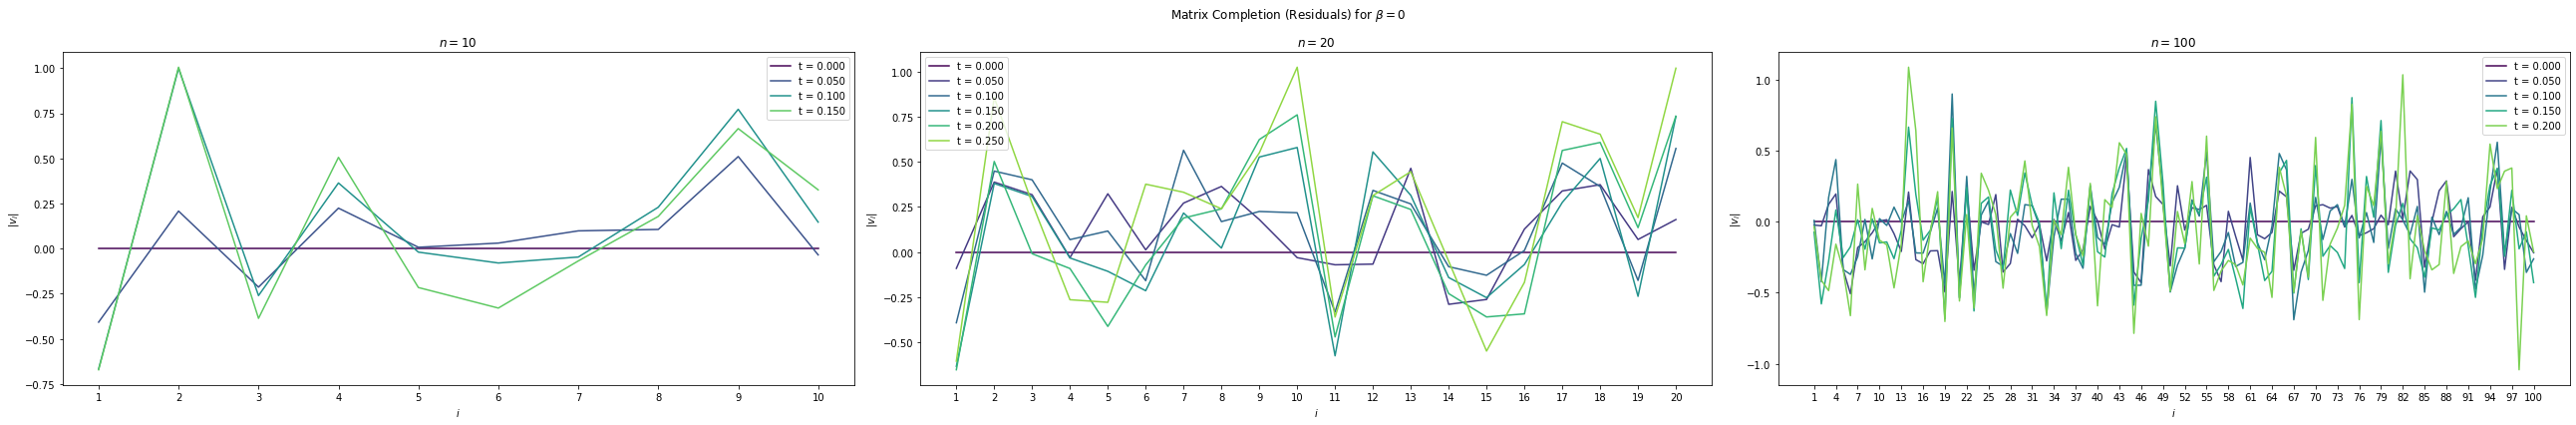

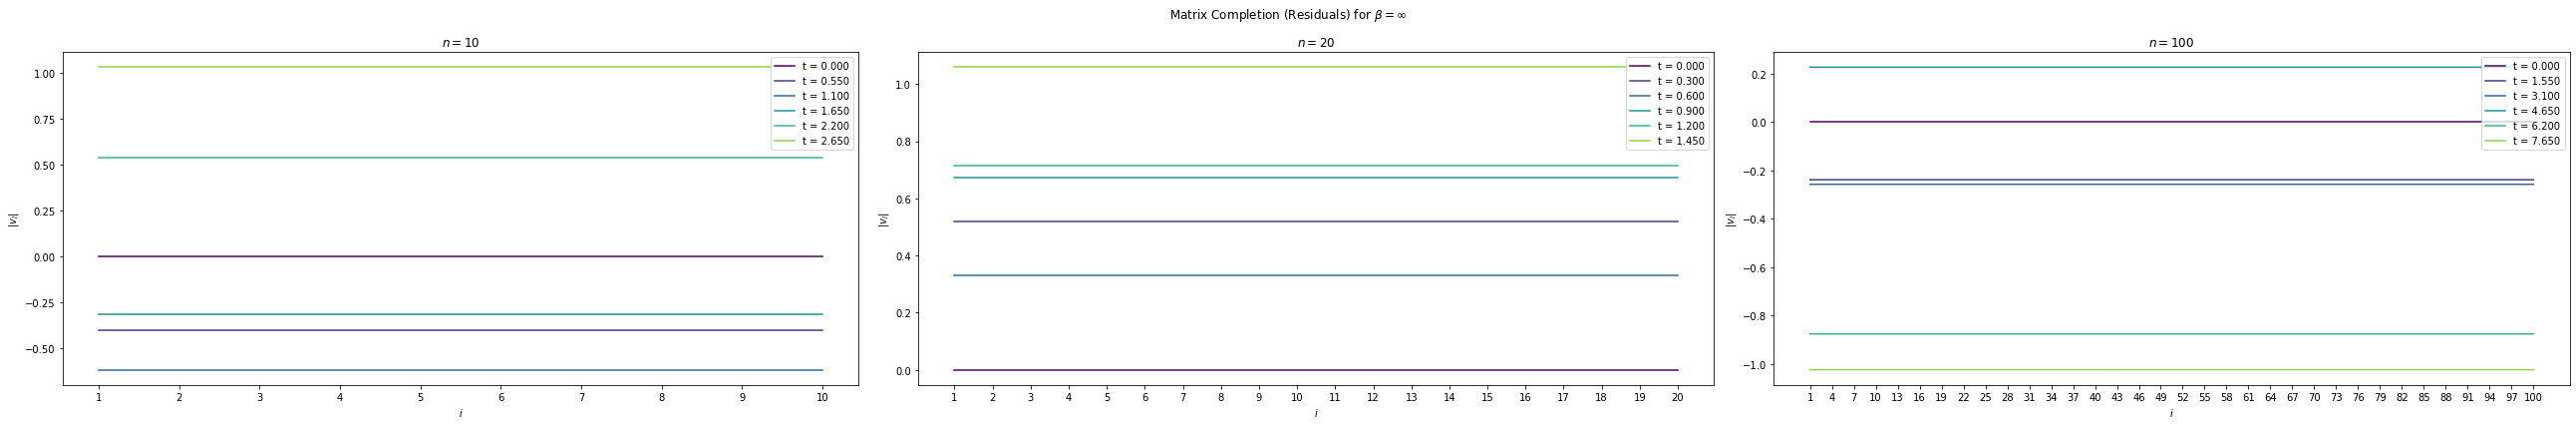

In [50]:
step_size = 0.05
num_plotted = 5
dims = [10, 20, 100]
betas = [0, float('inf')]
init_values = [np.zeros(dim) for dim in dims]
cmap = pylab.get_cmap('viridis')

for beta in betas:
    fig, ax = plt.subplots(1, len(init_values), figsize=(36, 6))
    formatted_beta = ('0' if beta == 0 else '\infty')
    fig.suptitle(f"Matrix Completion $v$ for $\\beta = {formatted_beta}$")
    for i, init_value in enumerate(init_values):
        proc = MatrixCompletion(init_value=init_value, h=step_size, beta=beta)
        steps = proc.extinct_simulate()
        ax[i].set_xlabel('$i$')
        ax[i].set_ylabel('$|v_i|$')
        ax[i].set_title(f"$n = {proc.n}$")
        # plot all vals
        # ax[i].plot(np.linspace(0.0, step_size * steps, num=steps+1), proc.vals)
        # plot a subset of vals
        plot_step = math.ceil(float(steps) / num_plotted)
        cur = 0
        to_plot = []
        while cur < steps + 1:
            to_plot.append(cur)
            cur += plot_step

        if (to_plot[-1] != steps):
            to_plot += [steps]

        
        x = np.arange(1, proc.n + 1, 1)
        if proc.n <= 25:
            ax[i].set_xticks(x)
        else:
            ax[i].set_xticks(np.arange(1, proc.n + 1, 3))
        color = matplotlib.colors.to_hex(color)
        for color_index, index in enumerate(to_plot):
            color = cmap(1.*color_index/len(to_plot))
            ax[i].plot(x, proc.vals[index], label=f"t = {(step_size * index):.3f}", color=color)
        ax[i].legend()
    fig.tight_layout()
plt.show()


## t-SNE Projection
Visualizing these are hard. Let's see if projecting down to two dimensions makes this easier to visualize and maybe provide interesting insight.

In [ ]:
from sklearn import 

# Filtered Matrix Process
Pick some number of lines to show the transformation of the V

In [46]:
from utils.filtered_matrix_completion import FilteredMatrixProcess

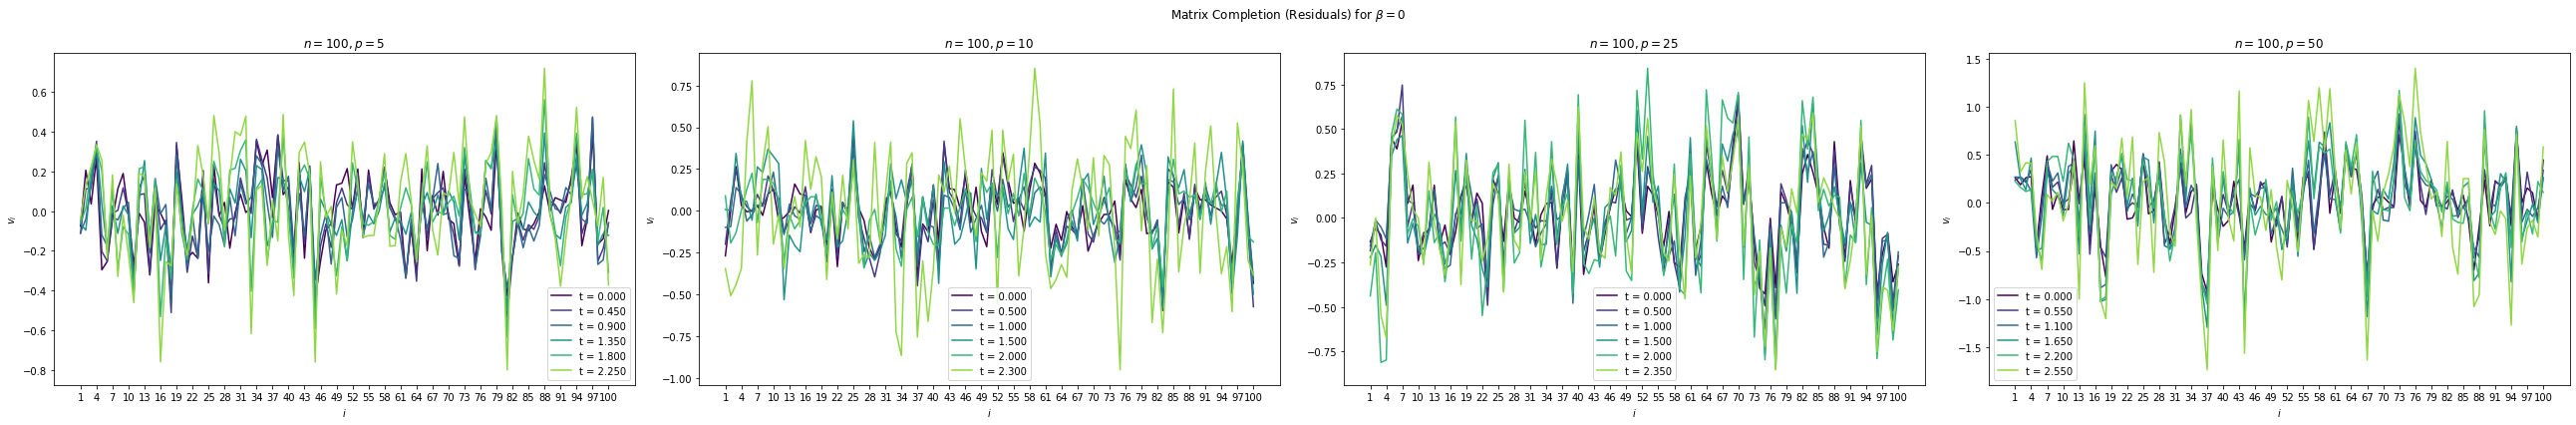

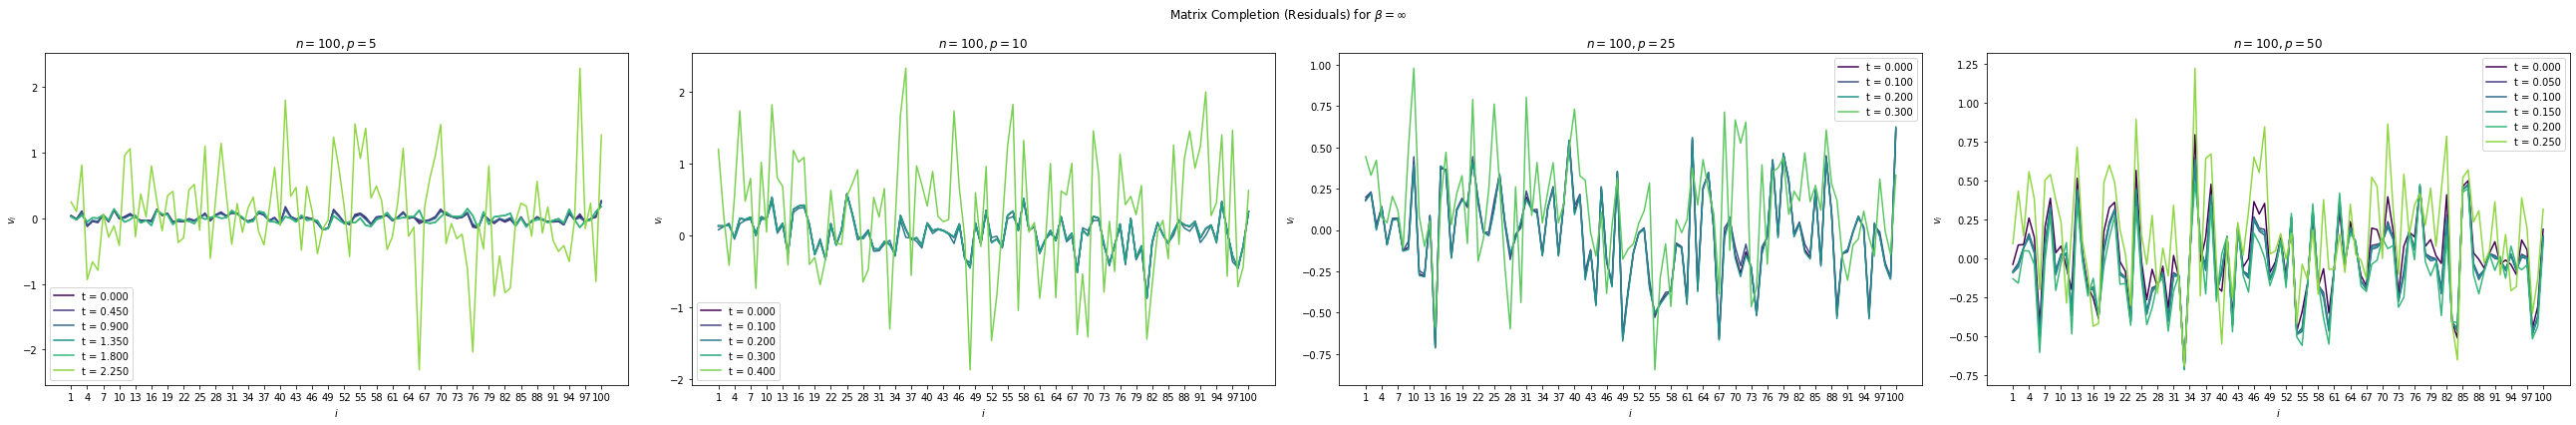

In [49]:
step_size = 0.05
n = 100
betas = [0, float('inf')]
ranks = [5, 10 ,25, 50]

for beta in betas:
    fig, ax = plt.subplots(1, len(ranks), figsize=(36, 6))
    formatted_beta = ('0' if beta == 0 else '\infty')
    fig.suptitle(f"Filtered Matrix Completion $v$ for $\\beta = {formatted_beta}$")
    for i, p in enumerate(ranks):
        proc = FilteredMatrixProcess(n=n, p=p, h=step_size, beta=beta)
        steps = proc.extinct_simulate()
        #ax[i].set_xlabel('$t$')
        ax[i].set_xlabel('$i$')
        ax[i].set_ylabel('$v_i$')
        ax[i].set_title(f"$n = {proc.n}, p = {proc.p}$")
        #ax[i].plot(np.linspace(0.0, step_size * steps, num=steps+1), proc.vals)
        plot_step = math.ceil(float(steps) / num_plotted)
        cur = 0
        to_plot = []
        while cur < steps + 1:
            to_plot.append(cur)
            cur += plot_step

        if (to_plot[-1] != steps):
            to_plot += [steps]

        
        x = np.arange(1, proc.n + 1, 1)
        if proc.n <= 25:
            ax[i].set_xticks(x)
        else:
            ax[i].set_xticks(np.arange(1, proc.n + 1, 3))
        color = matplotlib.colors.to_hex(color)
        for color_index, index in enumerate(to_plot):
            color = cmap(1.*color_index/len(to_plot))
            ax[i].plot(x, proc.vals[index], label=f"t = {(step_size * index):.3f}", color=color)
        ax[i].legend()
    fig.tight_layout()

plt.show()
